In [ ]:
import os
from google.colab import drive

# Google Drive 마운트
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 데이터를 저장할 폴더 생성
data_folder = '/content/drive/MyDrive/naver/MZ공유드라이브/data'
os.makedirs(data_folder, exist_ok=True)

# 데이터 압축 파일 다운로드 및 풀기
data_url = 'https://aistages-api-public-prod.s3.amazonaws.com/app/Competitions/000266/data/data.tar.gz'
data_tar_path = os.path.join(data_folder, 'data.tar.gz')

# 데이터 다운로드
!wget {data_url} -O {data_tar_path}

# 압축 파일 풀기
!tar -zxvf {data_tar_path} -C {data_folder}


--2024-01-15 09:50:48--  https://aistages-api-public-prod.s3.amazonaws.com/app/Competitions/000266/data/data.tar.gz
Resolving aistages-api-public-prod.s3.amazonaws.com (aistages-api-public-prod.s3.amazonaws.com)... 52.219.204.55, 52.219.58.114, 52.219.204.75, ...
Connecting to aistages-api-public-prod.s3.amazonaws.com (aistages-api-public-prod.s3.amazonaws.com)|52.219.204.55|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2161679447 (2.0G) [binary/octet-stream]
Saving to: ‘/content/drive/MyDrive/naver/MZ공유드라이브/data/data.tar.gz’

tent/drive/MyDrive/   1%[                    ]  30.93M  8.68MB/s    eta 4m 18s ^C
dataset/
dataset/test/
dataset/test.json
dataset/train/
dataset/train.json
dataset/train/0000.jpg
dataset/train/0001.jpg
dataset/train/0002.jpg
dataset/train/0003.jpg
dataset/train/0004.jpg
dataset/train/0005.jpg
dataset/train/0006.jpg
dataset/train/0007.jpg
dataset/train/0008.jpg
dataset/train/0009.jpg
dataset/train/0010.jpg
dataset/train/0011.jpg

In [ ]:
!wget --load-cookies ~/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies ~/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1Si4X0PltMRKQdCRCpj2oCMKSOpjcVHIV' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1Si4X0PltMRKQdCRCpj2oCMKSOpjcVHIV" -O /content/drive/MyDrive/naver/MZ공유드라이브/data/dataset/train_eye_eda.json && rm -rf ~/cookies.txt

!wget --load-cookies ~/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies ~/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1ZrKWKk4w9c_Jgr1Yy5Z-UDXdhLUVReq0' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1ZrKWKk4w9c_Jgr1Yy5Z-UDXdhLUVReq0" -O /content/drive/MyDrive/naver/MZ공유드라이브/data/dataset/val_eye_eda.json && rm -rf ~/cookies.txt


--2024-01-14 01:39:27--  https://docs.google.com/uc?export=download&confirm=&id=1Si4X0PltMRKQdCRCpj2oCMKSOpjcVHIV
Resolving docs.google.com (docs.google.com)... 74.125.196.100, 74.125.196.139, 74.125.196.102, ...
Connecting to docs.google.com (docs.google.com)|74.125.196.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1Si4X0PltMRKQdCRCpj2oCMKSOpjcVHIV&export=download [following]
--2024-01-14 01:39:27--  https://drive.usercontent.google.com/download?id=1Si4X0PltMRKQdCRCpj2oCMKSOpjcVHIV&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 108.177.13.132, 2607:f8b0:400c:c09::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|108.177.13.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6648649 (6.3M) [application/octet-stream]
Saving to: ‘/content/drive/MyDrive/naver/MZ공유드라이브/data/dataset/train_eye_eda.json’

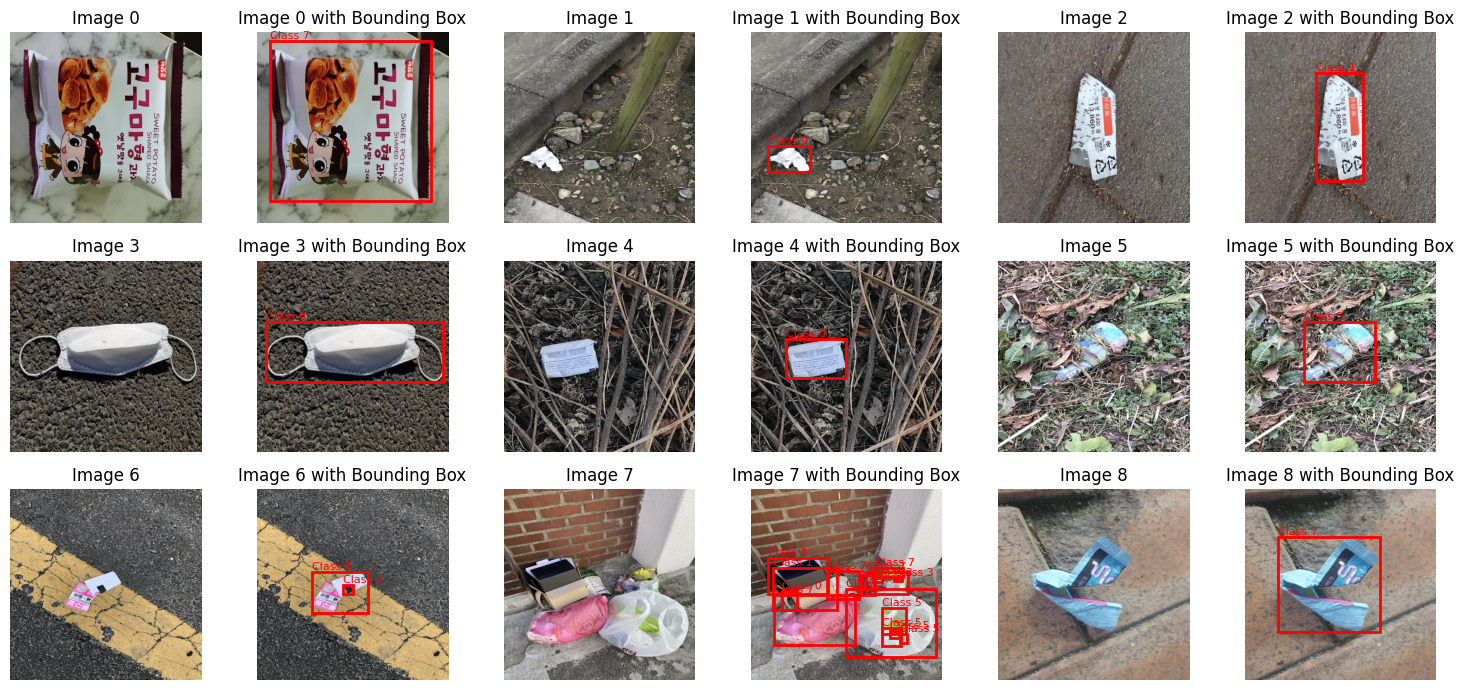

In [ ]:
import json
import os
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random

# 데이터셋 폴더 경로
dataset_path = '/content/drive/MyDrive/naver/MZ공유드라이브/data/dataset'  # 실제 경로로 바꾸세요

# train.json 파일 경로
json_path = os.path.join(dataset_path, 'train_eye_eda.json')

# JSON 파일에서 이미지 및 바운딩 박스 정보 읽기
with open(json_path, 'r') as json_file:
    data = json.load(json_file)

images = data['images']
annotations = data['annotations']

# 랜덤으로 9개 이미지 선택
selected_images = random.sample(images, 9)

# 이미지와 바운딩 박스를 함께 플로팅
plt.figure(figsize=(15, 7))

for i, image_info in enumerate(selected_images):
    annotation_info = [anno for anno in annotations if anno['image_id'] == image_info['id']]

    # 왼쪽에 기존 사진 플로팅
    plt.subplot(3, 6, i * 2 + 1)
    img_path = os.path.join(dataset_path, image_info['file_name'])
    img = Image.open(img_path)
    plt.imshow(img)
    plt.title(f'Image {i}')
    plt.axis('off')

    # 오른쪽에 바운딩 박스와 합친 사진 플로팅
    plt.subplot(3, 6, i * 2 + 2)
    plt.imshow(img)

    for bbox_info in annotation_info:
        bbox = bbox_info['bbox']
        category_id = bbox_info['category_id']

        # 바운딩 박스 그리기
        rect = patches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3],
                                 linewidth=2, edgecolor='r', facecolor='none')
        plt.gca().add_patch(rect)
        plt.text(bbox[0], bbox[1], f'Class {category_id}', color='r', fontsize=8, verticalalignment='bottom')

    plt.title(f'Image {i} with Bounding Box')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
!pip install imgaug

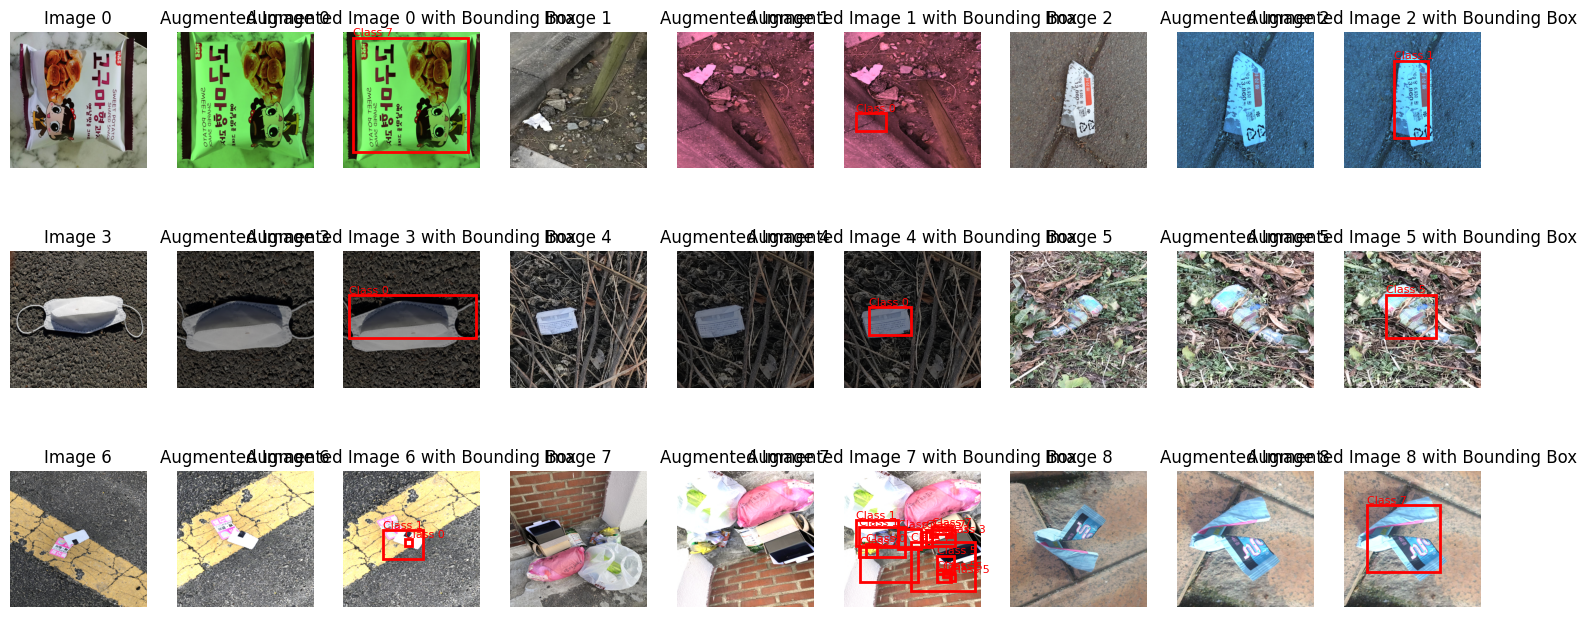

In [ ]:
import imgaug as ia
from imgaug import augmenters as iaa
import numpy as np  # 추가된 부분

# 이미지 업샘플링을 위한 Augmentor 정의
augmentor = iaa.Sequential([
    iaa.Affine(scale=(1.0, 1.5)),  # 크기를 1.0에서 1.5 배로 랜덤하게 조절
    iaa.Fliplr(0.5),  # 좌우 반전
    iaa.Flipud(0.5),  # 상하 반전
    iaa.GaussianBlur(sigma=(0.0, 0.5)),  # 가우시안 블러 적용
    iaa.Multiply((0.5, 1.5), per_channel=0.5)  # 각 채널에 대해 밝기를 0.5에서 1.5 배로 조절
])

# 이미지 업샘플링 후 결과를 플로팅
plt.figure(figsize=(15, 7))

for i, image_info in enumerate(selected_images):
    annotation_info = [anno for anno in annotations if anno['image_id'] == image_info['id']]

    # 원본 이미지 플로팅
    plt.subplot(3, 9, i * 3 + 1)
    img_path = os.path.join(dataset_path, image_info['file_name'])
    img = Image.open(img_path)

    # 이미지를 numpy 배열로 변환
    img_np = np.array(img)

    # imgaug를 사용하여 랜덤 업샘플링 수행
    augmented_img = augmentor.augment_image(img_np)

    plt.imshow(img_np)
    plt.title(f'Image {i}')
    plt.axis('off')

    # 업샘플링된 이미지 플로팅
    plt.subplot(3, 9, i * 3 + 2)
    plt.imshow(augmented_img)
    plt.title(f'Augmented Image {i}')
    plt.axis('off')

    # 바운딩 박스와 함께 업샘플링된 이미지 플로팅
    plt.subplot(3, 9, i * 3 + 3)
    plt.imshow(augmented_img)

    for bbox_info in annotation_info:
        bbox = bbox_info['bbox']
        category_id = bbox_info['category_id']

        # 바운딩 박스 그리기
        rect = patches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3],
                                 linewidth=2, edgecolor='r', facecolor='none')
        plt.gca().add_patch(rect)
        plt.text(bbox[0], bbox[1], f'Class {category_id}', color='r', fontsize=8, verticalalignment='bottom')

    plt.title(f'Augmented Image {i} with Bounding Box')
    plt.axis('off')

plt.tight_layout()
plt.show()


## Cutmix

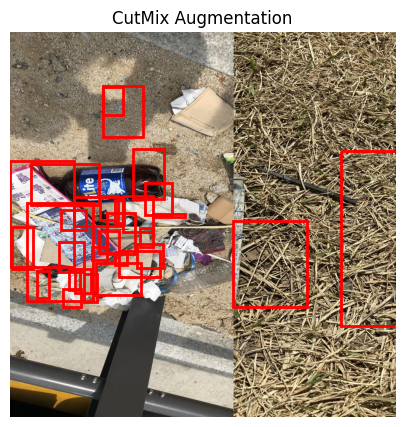

In [ ]:
import numpy as np

def cutmix_augmentation(images, annotations):
    # 두 개의 이미지를 무작위로 선택
    selected_images = np.random.choice(images, 2, replace=False)

    # 선택된 이미지와 해당하는 바운딩 박스 가져오기
    img1, img2 = [Image.open(os.path.join(dataset_path, img_info['file_name'])) for img_info in selected_images]
    annos1, annos2 = [anno for anno in annotations if anno['image_id'] == selected_images[0]['id']], [anno for anno in annotations if anno['image_id'] == selected_images[1]['id']]

    # CutMix 수행
    cut_ratio = np.random.uniform(0.4, 0.6)  # CutMix 비율을 0.4에서 0.6 사이의 값으로 무작위로 선택
    img1_array, img2_array = np.array(img1), np.array(img2)
    mixed_img = img1_array.copy()
    mixed_img[:, int((1 - cut_ratio) * img1.width):] = img2_array[:, int((1 - cut_ratio) * img2.width):]

    # 바운딩 박스 수정
    mixed_annos = []

    for anno in annos1:
        mixed_bbox = anno['bbox'].copy()

        # CutMix된 이미지에서의 바운딩 박스 좌표 조정
        mixed_bbox[0] = int(mixed_bbox[0] * (1 - cut_ratio))
        mixed_bbox[2] = int(mixed_bbox[2] * (1 - cut_ratio))

        mixed_annos.append({
            'id': len(mixed_annos) + 1,
            'bbox': mixed_bbox,
            'area': anno['area'],
            'category_id': anno['category_id'],
            'image_id': selected_images[0]['id'],  # CutMix된 이미지의 ID로 설정
            'iscrowd': anno['iscrowd']
        })

    for anno in annos2:
        mixed_bbox = anno['bbox'].copy()

        # CutMix된 이미지에서의 바운딩 박스 좌표 조정
        mixed_bbox[0] = int(mixed_bbox[0] + img1.width * (1 - cut_ratio))
        mixed_bbox[2] = int(mixed_bbox[2])

        mixed_annos.append({
            'id': len(mixed_annos) + 1,
            'bbox': mixed_bbox,
            'area': anno['area'],
            'category_id': anno['category_id'],
            'image_id': selected_images[0]['id'],  # CutMix된 이미지의 ID로 설정
            'iscrowd': anno['iscrowd']
        })

    return Image.fromarray(mixed_img), mixed_annos

# CutMix Augmentation 수행
cutmix_img, cutmix_annos = cutmix_augmentation(images, annotations)

# 결과 플로팅
plt.figure(figsize=(10, 5))
plt.imshow(cutmix_img)
for bbox in cutmix_annos:
    rect = patches.Rectangle((bbox['bbox'][0], bbox['bbox'][1]), bbox['bbox'][2], bbox['bbox'][3],
                             linewidth=2, edgecolor='r', facecolor='none')
    plt.gca().add_patch(rect)
plt.title('CutMix Augmentation')
plt.axis('off')
plt.show()


## 자.. 다시..


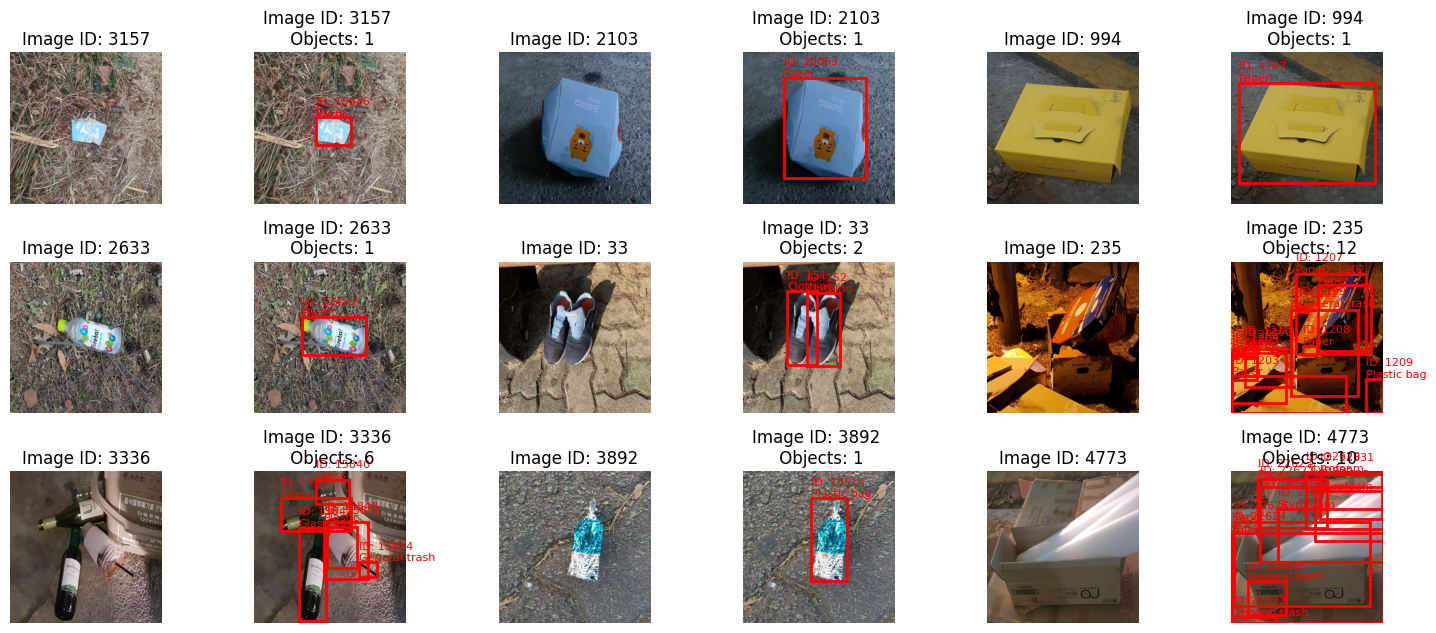

In [ ]:
import json
import os
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random

# Modify dataset related settings
data_root = 'data/recycle/'
metainfo = {
    'classes': ('General trash', 'Paper', 'Paper pack', 'Metal', 'Glass',
                'Plastic', 'Styrofoam', 'Plastic bag', 'Battery', 'Clothing',),
    'palette': [
        (220, 20, 60), (119, 11, 32), (0, 0, 230), (106, 0, 228), (60, 20, 220),
        (0, 80, 100), (0, 0, 70), (50, 0, 192), (250, 170, 30), (255, 0, 0)
    ]
}

# 데이터셋 폴더 경로
dataset_path = '/content/drive/MyDrive/naver/MZ공유드라이브/data/dataset'  # 실제 경로로 바꾸세요

# train.json 파일 경로
json_path = os.path.join(dataset_path, 'train_eye_eda.json')

# JSON 파일에서 이미지 및 바운딩 박스 정보 읽기
with open(json_path, 'r') as json_file:
    data = json.load(json_file)

images = data['images']
annotations = data['annotations']

# 랜덤으로 9개 이미지 선택
selected_images = random.sample(images, 9)

# 이미지와 바운딩 박스를 함께 플로팅
plt.figure(figsize=(15, 7))

total_objects = 0  # Counter for total objects

for i, image_info in enumerate(selected_images):
    annotation_info = [anno for anno in annotations if anno['image_id'] == image_info['id']]

    # 왼쪽에 기존 사진 플로팅
    plt.subplot(3, 6, i * 2 + 1)
    img_path = os.path.join(dataset_path, image_info['file_name'])
    img = Image.open(img_path)
    plt.imshow(img)
    plt.title(f'Image ID: {image_info["id"]}')  # Display image ID as title
    plt.axis('off')

    # 오른쪽에 바운딩 박스와 합친 사진 플로팅
    plt.subplot(3, 6, i * 2 + 2)
    plt.imshow(img)

    object_count = 0  # Counter for objects in current image

    for j, bbox_info in enumerate(annotation_info):
        bbox = bbox_info['bbox']
        category_id = bbox_info['category_id']
        bounding_box_id = bbox_info['id']

        # 바운딩 박스 그리기
        rect = patches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3],
                                 linewidth=2, edgecolor='r', facecolor='none')
        plt.gca().add_patch(rect)

        # Display bounding box ID and class name
        class_name = metainfo['classes'][category_id]
        plt.text(bbox[0], bbox[1], f'ID: {bounding_box_id}\n{class_name}', color='r', fontsize=8, verticalalignment='bottom')

        object_count += 1


    plt.title(f'Image ID: {image_info["id"]} \n Objects: {object_count}')  # Display image ID and object count as title
    plt.axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to include the suptitle
plt.show()


# 진짜 찐막 모자익 컷믹스


In [ ]:
import json
import os
import numpy as np
import cv2
import torch
from PIL import Image, ImageDraw
import random

# Modify dataset related settings
data_root = '/content/drive/MyDrive/naver/MZ공유드라이브/data/dataset'
metainfo = {
    'classes': ('General trash', 'Paper', 'Paper pack', 'Metal', 'Glass',
                'Plastic', 'Styrofoam', 'Plastic bag', 'Battery', 'Clothing',),
    'palette': [
        (220, 20, 60), (119, 11, 32), (0, 0, 230), (106, 0, 228), (60, 20, 220),
        (0, 80, 100), (0, 0, 70), (50, 0, 192), (250, 170, 30), (255, 0, 0)
    ]
}

# 데이터셋 폴더 경로
dataset_path = '/content/drive/MyDrive/naver/MZ공유드라이브/data/dataset'  # 실제 경로로 바꾸세요

# train.json 파일 경로
json_path = os.path.join(dataset_path, 'train_eye_eda.json')

In [ ]:
def xywh2xyxy(x, w=1024, h=1024, padw=0, padh=0):
    # Convert nx4 boxes from [x, y, w, h] normalized to [x1, y1, x2, y2] where xy1=top-left, xy2=bottom-right
    y = x.clone() if isinstance(x, torch.Tensor) else np.copy(x)
    y[:, 0] = w * (x[:, 0] - x[:, 2] / 2) + padw  # top left x
    y[:, 1] = h * (x[:, 1] - x[:, 3] / 2) + padh  # top left y
    y[:, 2] = w * (x[:, 0] + x[:, 2] / 2) + padw  # bottom right x
    y[:, 3] = h * (x[:, 1] + x[:, 3] / 2) + padh  # bottom right y
    return y

def xyxy2xywh(x, w=1024, h=1024):
    # Convert nx4 boxes from [x1, y1, x2, y2] to [x, y, w, h] normalized where xy1=top-left, xy2=bottom-right
    y = x.clone() if isinstance(x, torch.Tensor) else np.copy(x)
    y[:, 0] = ((x[:, 0] + x[:, 2]) / 2) / w  # x center
    y[:, 1] = ((x[:, 1] + x[:, 3]) / 2) / h  # y center
    y[:, 2] = (x[:, 2] - x[:, 0]) / w  # width
    y[:, 3] = (x[:, 3] - x[:, 1]) / h  # height
    return y

# 중심점에 따라 패딩 조절, 바운딩 박스 업데이트
def noPad(label, xc, yc, xmin, ymin, s):
    label4_ = label.copy()
    if (xc > s) & (yc < s):
        label4_[:, 1] = label4_[:, 1] - xmin
        label4_[:, 3] = label4_[:, 3] - xmin
    elif (xc < s) & (yc > s):
        label4_[:, 2] = label4_[:, 2] - ymin
        label4_[:, 4] = label4_[:, 4] - ymin
    elif (xc > s) & (yc > s):
        label4_[:, 1] = label4_[:, 1] - xmin
        label4_[:, 3] = label4_[:, 3] - xmin
        label4_[:, 2] = label4_[:, 2] - ymin
        label4_[:, 4] = label4_[:, 4] - ymin
    return label4_

In [ ]:

# Visualization bbox, image
def myFig(img, bbox, drawB=True):
    image = Image.fromarray(img, "RGB")
    draw = ImageDraw.Draw(image)

    if drawB:
        for i in range(len(bbox)):
            xmin = bbox[i][1]
            ymin = bbox[i][2]
            xmax = bbox[i][3]
            ymax = bbox[i][4]

            draw.rectangle(
                (xmin, ymin, xmax, ymax), outline=(255, 0, 0), width=1
            )  # bounding box
    #     display(image)
    return image

In [ ]:
# CutMix
def cutmix(img1, labels1, img2, labels2):
    beta = np.random.uniform(0.3, 0.7)  # beta parameter for CutMix

    img = (beta * img1 + (1.0 - beta) * img2).astype(np.uint8)

    # Adjust labels for the mixed image
    labels_cutmix = np.vstack((labels1, labels2))
    if labels_cutmix.size:
        labels_cutmix[:, 1:] *= beta  # Adjust coordinates based on beta

    return img, labels_cutmix


In [ ]:
# Mosaic
def Mosaic(img_folder, indices, annotations):
    labels4 = []
    img_size = 1024
    s = img_size
    mosaic_border = [-img_size // 2, -img_size // 2]

    # center point
    yc, xc = (
        int(random.uniform(-x, 2 * s + x)) for x in mosaic_border
    )  # mosaic center x, y # 81 172

    for i, index in enumerate(indices):
        # Load image
        img = cv2.imread(os.path.join(img_folder, index))
        h, w = 1024, 1024

        # place img in img4
        if i == 0:  # top left
            img4 = np.full(
                (s * 2, s * 2, img.shape[2]), 114, dtype=np.uint8
            )  # base image with 4 tiles
            x1a, y1a, x2a, y2a = (
                max(xc - w, 0),
                max(yc - h, 0),
                xc,
                yc,
            )  # xmin, ymin, xmax, ymax (large image)
            x1b, y1b, x2b, y2b = (
                w - (x2a - x1a),
                h - (y2a - y1a),
                w,
                h,
            )  # xmin, ymin, xmax, ymax (small image)

            xmin, ymin = x1a, y1a

        elif i == 1:  # top right
            x1a, y1a, x2a, y2a = xc, max(yc - h, 0), min(xc + w, s * 2), yc
            x1b, y1b, x2b, y2b = 0, h - (y2a - y1a), min(w, x2a - x1a), h
        elif i == 2:  # bottom left
            x1a, y1a, x2a, y2a = max(xc - w, 0), yc, xc, min(s * 2, yc + h)
            x1b, y1b, x2b, y2b = w - (x2a - x1a), 0, w, min(y2a - y1a, h)
        elif i == 3:  # bottom right
            x1a, y1a, x2a, y2a = xc, yc, min(xc + w, s * 2), min(s * 2, yc + h)
            x1b, y1b, x2b, y2b = 0, 0, min(w, x2a - x1a), min(y2a - y1a, h)

            xmax, ymax = x2a, y2a

        img4[y1a:y2a, x1a:x2a] = img[y1b:y2b, x1b:x2b]  # img4[ymin:ymax, xmin:xmax]
        padw = x1a - x1b
        padh = y1a - y1b

        # Labels
        labels = []
        for anno in annotations[i]:
            labels.append([anno["category_id"], *anno["bbox"]])  # xywh
        labels = np.array(labels)

        if labels.size:
            labels[:, 1:] = xywh2xyxy(
                labels[:, 1:], w, h, padw, padh
            )  # normalized xywh to pixel xyxy format
            labels[labels < 0] = 0
            labels[labels > s * 2] = s * 2
        labels4.append(labels)

    # Concat/clip labels
    labels4 = np.concatenate(labels4, 0)

    # no padding
    img4 = img4[ymin:ymax, xmin:xmax, :]
    labels4 = noPad(labels4, xc, yc, xmin, ymin, s)

    # resize
    img4 = cv2.resize(img4, (w, h))
    labels4[:, 1:] = xyxy2xywh(labels4[:, 1:], w=xmax - xmin, h=ymax - ymin)
    labels4 = labels4[labels4[:, 3] > 0]
    labels4 = labels4[labels4[:, 4] > 0]

    return img4, labels4

In [ ]:

if __name__ == "__main__":
    # image files and labels
    # train set & not Scratch
    data_path = "/content/drive/MyDrive/naver/MZ공유드라이브/data/dataset"
    img_folder = os.path.join(data_path, "train")
    im_files = [i for i in os.listdir(img_folder) if i.endswith("jpg")]

    # random 4 images
    indices = random.choices(
        im_files, k=4
    )  # 3 additional image indices # [0, 3292, 20762, 18713]
    random.shuffle(indices)  # [18713, 0, 20762, 3292]

    # train.json 파일 경로
    json_path = os.path.join(data_path, "train_eye_eda.json")

    # JSON 파일에서 이미지 및 바운딩 박스 정보 읽기
    with open(json_path, "r") as json_file:
        data = json.load(json_file)

    annotations = []
    for index in indices:
        annotations.append(
            [anno for anno in data["annotations"] if anno["image_id"] == int(index[:4])]
        )

    # CutMix
    img1 = cv2.imread(os.path.join(img_folder, indices[0]))
    labels1 = np.array([[anno["category_id"], *anno["bbox"]] for anno in annotations[0]])

    img2 = cv2.imread(os.path.join(img_folder, indices[1]))
    labels2 = np.array([[anno["category_id"], *anno["bbox"]] for anno in annotations[1]])

    # Check if bounding box information is available
    if labels1.shape[0] > 0 and labels2.shape[0] > 0:
        img_cutmix, labels_cutmix = cutmix(img1, labels1, img2, labels2)

        # CutMix
        output_dir = "/content/drive/MyDrive/naver/MZ공유드라이브/data/dataset/Upsampling/"
        os.makedirs(output_dir, exist_ok=True)  # 디렉토리가 없으면 생성

        img_cutmix = Image.fromarray(img_cutmix)
        img_cutmix.save(
            os.path.join(output_dir, "cutmix_sample.jpg"),
            "JPEG",
        )

        img_bbox_cutmix = myFig(img_cutmix, labels_cutmix)
        img_bbox_cutmix.save(
            os.path.join(output_dir, "cutmix_sample_bbox.jpg"),
            "JPEG",
        )
    else:
        print("Skipping CutMix for images with missing bounding box information.")


    # Mosaic
    img_mosaic, labels_mosaic = Mosaic(img_folder, indices, annotations)

    # Mosaic
    output_dir = "/content/drive/MyDrive/naver/MZ공유드라이브/data/dataset/Upsampling/"
    os.makedirs(output_dir, exist_ok=True)  # 디렉토리가 없으면 생성

    img_mosaic = Image.fromarray(img_mosaic)
    img_mosaic.save(
        os.path.join(output_dir, "mosaic_sample.jpg"),
        "JPEG",
    )

    img_bbox_mosaic = myFig(img_mosaic, labels_mosaic)
    img_bbox_mosaic.save(
        os.path.join(output_dir, "mosaic_sample_bbox.jpg"),
        "JPEG",
    )


TypeError: a bytes-like object is required, not 'Image'